I decided to do most of the figure making and exploratory analysis in **Python** as that is more comfortable in the present. This is also because having done much of the previous portion in **R** required a little more time to troubleshoot due to having less experience with it, and I want to be mindful of time. Given the opportunity to work with you all, I would be very excited to learn more **R**/Tidyverse! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy as cp
sns.set_style('darkgrid')
%matplotlib inline

There are the CSV files I made in Part 1 to fascilitate figure making:

DataAnalyst_Ecom_session_with_yr_mo_data.csv - this is just the *sessionCounts* CSV from before, but with the date deconstructed into mo, year columns

DataAnalyst_Ecom_agg_data.csv - this is the aggrigated data

DataAnalyst_Ecom_MOM_data.csv - this is the month over month data

# Exploratory Analysis

I am coming directly from academia in astrophysics, so I do not have a ton of experience yet with Ecomm. / Internet data. In my limited experience through practice, my flow is usually to the following in any order,

1. Look for trends within the data.
2. Check correlations in the data.
3. Create bar plots and/or histograms with each variable.
4. Consider the time series.

Along the way, do some minor/major calculations, add some binning or extra labelling, etc. 

For each of the data sets, 1. Aggrigated Data, 2. Month over Month I'll do the above and use that to perhaps drive the revisiting of 3. individual session data.

## Aggrigated Data

In [2]:
#read in the data
df_agg = pd.read_csv('DataAnalyst_Ecom_agg_data.csv', delimiter=' ')

In [3]:
df_agg.head(5)

,dim_year,dim_month,addsToCart,sessions_month,transactions_month,QTY_month,ECR_month
1,2012,7,191504,1325.153448,31.312069,54.834483,0.023629
2,2012,8,217666,1373.110184,32.185309,57.843072,0.023440
3,2012,9,123726,1179.097865,27.861210,50.580071,0.023629
4,2012,10,139803,1097.527919,24.153976,45.052453,0.022008
5,2012,11,186572,1062.966667,25.878333,46.886667,0.024345


In [4]:
# create ECR label 
#also use this time to update the date label for time series, probably shouldn't have unpacked that
df_agg_temp = cp.deepcopy(df_agg)
year_agg = np.char.add(df_agg_temp['dim_year'].iloc[:].values.astype(str),'-')
month_agg = df_agg_temp['dim_month'].iloc[:].values.astype(str)

df_agg['dim_date']=np.char.add(year_agg,month_agg)
df_agg = df_agg.drop(['dim_year','dim_month'], axis=1)

Plot the variables as a function of time.


<AxesSubplot:xlabel='Date', ylabel='ECR'>

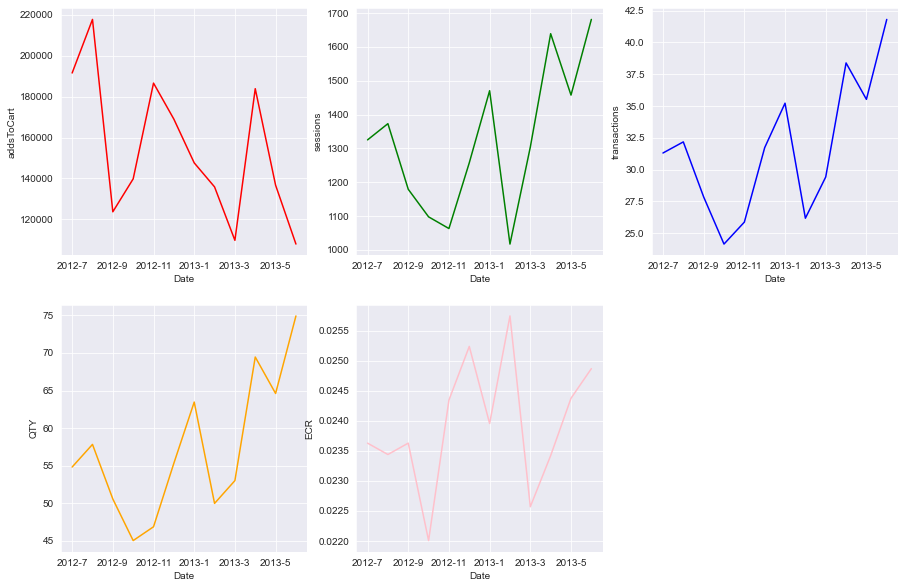

In [5]:
print('Plot the variables as a function of time.')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[-1, -1].axis('off')

df_agg.plot(x='dim_date',y='addsToCart',xlabel='Date',ylabel='addsToCart',legend=False, color='red',ax=axes[0,0])
df_agg.plot(x='dim_date',y='sessions_month',xlabel='Date',ylabel='sessions',legend=False, color='green',ax=axes[0,1])
df_agg.plot(x='dim_date',y='transactions_month',xlabel='Date',ylabel='transactions',legend=False, color='blue',ax=axes[0,2])
df_agg.plot(x='dim_date',y='QTY_month',xlabel='Date',ylabel='QTY',legend=False, color='orange',ax=axes[1,0])
df_agg.plot(x='dim_date',y='ECR_month',xlabel='Date',ylabel='ECR',legend=False, color='pink',ax=axes[1,1])

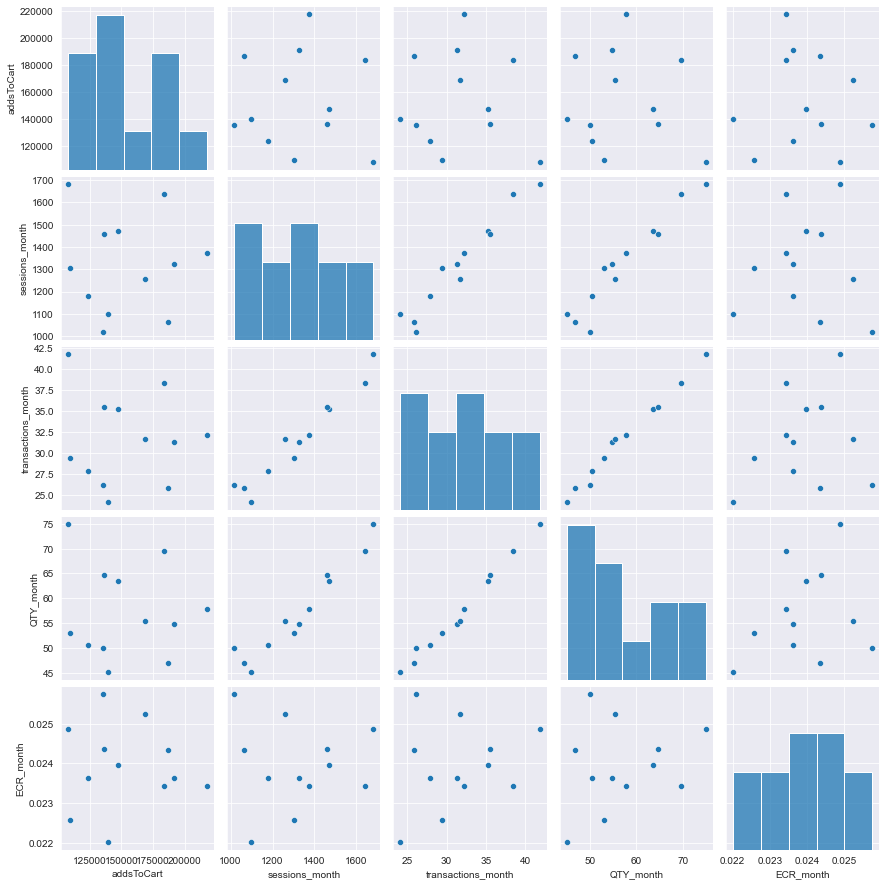

In [6]:
sns.pairplot(df_agg,palette='twilight_shifted')

Transactions, QTY, and Sessions all seem linearly correlated, so let's look at a table of that.

Most variables however do not appear strongly correlated.

In [7]:
corr = df_agg.corr()
corr.style.background_gradient(cmap='coolwarm')

,addsToCart,sessions_month,transactions_month,QTY_month,ECR_month
addsToCart,1.000000,-0.030914,-0.050122,-0.096251,-0.029301
sessions_month,-0.030914,1.000000,0.970724,0.961271,-0.012839
transactions_month,-0.050122,0.970724,1.000000,0.992503,0.225099
QTY_month,-0.096251,0.961271,0.992503,1.000000,0.235801
ECR_month,-0.029301,-0.012839,0.225099,0.235801,1.000000


## Month over Month
### For most recent two months
${\rm Month \ over \ Month \ (two \ months)} = \frac{\rm Current \ Month - Month \ Before \ Last}{\rm Month \ Before \ Last}$

In [8]:
df_MoM = pd.read_csv('DataAnalyst_Ecom_MOM_data.csv', delimiter=' ')

In [9]:
df_MoM.head(5)

,MoM2_dim_year,MoM2_dim_month,MoM2_addsToCart,MoM2_sessions,MoM2_transactions,MoM2_QTY,MoM2_ECR
1,2012,9,-35.4,-11.0,-11.0,-7.8,0.0
2,2012,10,-35.8,-20.1,-25.0,-22.1,-6.1
3,2012,11,50.8,-9.8,-7.1,-7.3,3.0
4,2012,12,20.9,14.6,31.4,22.8,14.7
5,2013,1,-20.9,38.3,36.1,35.4,-1.6


Since ECR ( ${\rm ECR}= \frac{\rm Transactions}{\rm Sessions}$ ) is a key metric, let's create a label for positive / negative MoM so that it's easier to highlight figures later.

In [10]:
# create ECR label 
#also use this time to update the date label for time series
df_MoM_temp = cp.deepcopy(df_MoM)
year_MoM = np.char.add(df_MoM_temp['MoM2_dim_year'].iloc[:].values.astype(str),'-')
month_MoM = df_MoM_temp['MoM2_dim_month'].iloc[:].values.astype(str)

ECRLab = df_MoM_temp['MoM2_ECR'].iloc[:].values.astype(str)
ECRvalues = df_MoM['MoM2_ECR'].iloc[:].values

#nL = len(df_MoM_temp['MoM_ECR'].iloc[:].values)

ECRLab[ECRvalues > 0] = 'positive ECR MoM'
ECRLab[ECRvalues == 0] = 'zero ECR MoM'
ECRLab[ECRvalues <= 0] = 'negative ECR MoM'

df_MoM['MoM2_ECR_Label']=ECRLab
df_MoM['MoM2_dim_date']=np.char.add(year_MoM,month_MoM)
df_MoM = df_MoM.drop(['MoM2_dim_year','MoM2_dim_month'], axis=1)

In [11]:
df_MoM

,MoM2_addsToCart,MoM2_sessions,MoM2_transactions,MoM2_QTY,MoM2_ECR,MoM2_ECR_Label,MoM2_dim_date
1,-35.4,-11.0,-11.0,-7.8,0.0,negative ECR MoM,2012-9
2,-35.8,-20.1,-25.0,-22.1,-6.1,negative ECR MoM,2012-10
3,50.8,-9.8,-7.1,-7.3,3.0,positive ECR MoM,2012-11
4,20.9,14.6,31.4,22.8,14.7,positive ECR MoM,2012-12
5,-20.9,38.3,36.1,35.4,-1.6,negative ECR MoM,2013-1
6,-19.6,-19.1,-17.5,-9.7,2.0,positive ECR MoM,2013-2
7,-25.6,-11.3,-16.5,-16.5,-5.8,negative ECR MoM,2013-3
8,35.3,61.2,46.6,38.9,-9.0,negative ECR MoM,2013-4
9,24.5,11.8,20.7,21.9,8.0,positive ECR MoM,2013-5
10,-41.3,2.6,8.9,7.9,6.2,positive ECR MoM,2013-6


<AxesSubplot:xlabel='MoM2_dim_date'>

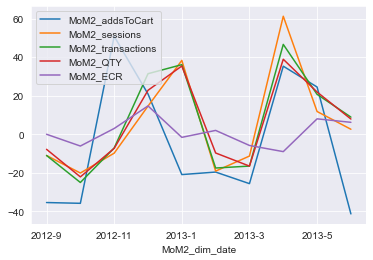

In [12]:
#look at how each variable evolves with time

df_MoM.plot(x='MoM2_dim_date')

<AxesSubplot:xlabel='Date', ylabel='ECR (MoM)'>

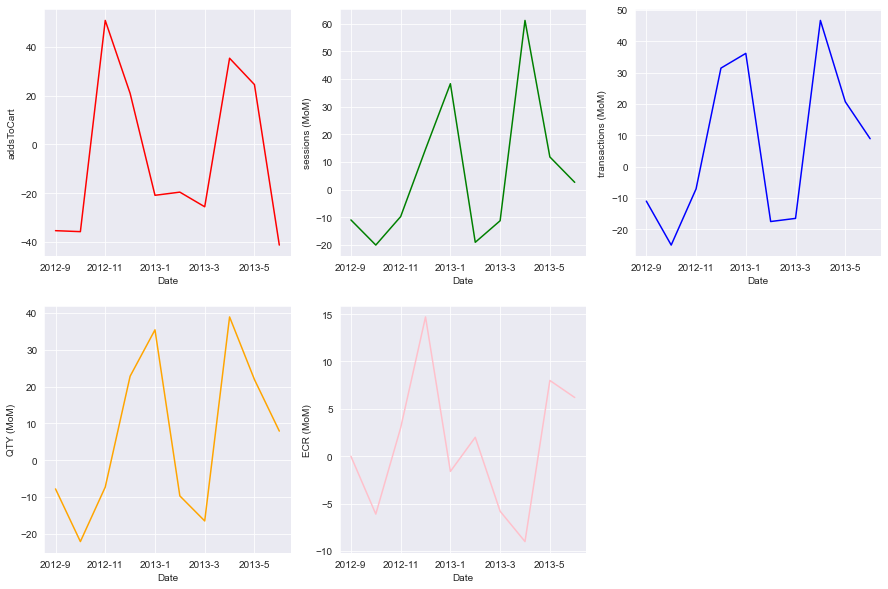

In [13]:
#above is too cluttered

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[-1, -1].axis('off')

df_MoM.plot(x='MoM2_dim_date',y='MoM2_addsToCart',xlabel='Date',ylabel='addsToCart',legend=False, color='red',ax=axes[0,0])
df_MoM.plot(x='MoM2_dim_date',y='MoM2_sessions',xlabel='Date',ylabel='sessions (MoM)',legend=False, color='green',ax=axes[0,1])
df_MoM.plot(x='MoM2_dim_date',y='MoM2_transactions',xlabel='Date',ylabel='transactions (MoM)',legend=False, color='blue',ax=axes[0,2])
df_MoM.plot(x='MoM2_dim_date',y='MoM2_QTY',xlabel='Date',ylabel='QTY (MoM)',legend=False, color='orange',ax=axes[1,0])
df_MoM.plot(x='MoM2_dim_date',y='MoM2_ECR',xlabel='Date',ylabel='ECR (MoM)',legend=False, color='pink',ax=axes[1,1])

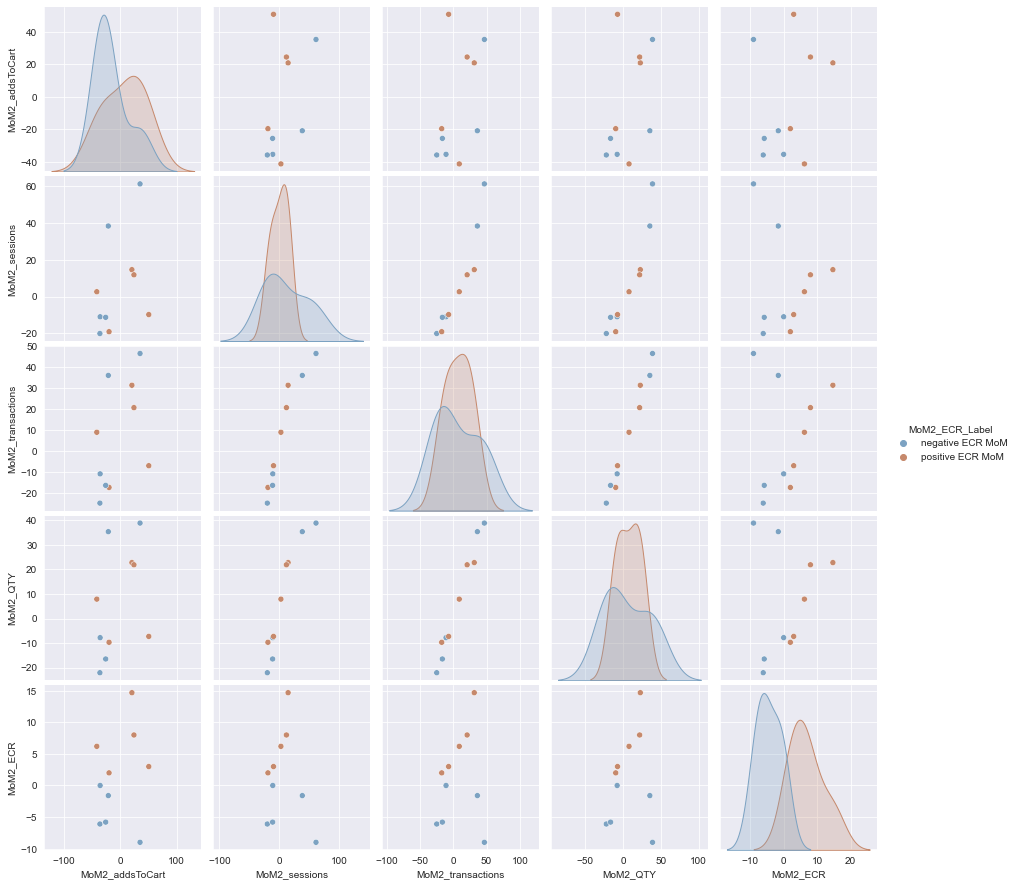

In [14]:
sns.pairplot(df_MoM.drop(['MoM2_dim_date'],axis=1),palette='twilight_shifted',hue='MoM2_ECR_Label')

In [15]:
corr = df_MoM.drop(['MoM2_dim_date'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,MoM2_addsToCart,MoM2_sessions,MoM2_transactions,MoM2_QTY,MoM2_ECR
MoM2_addsToCart,1.000000,0.417841,0.471903,0.434029,0.224390
MoM2_sessions,0.417841,1.000000,0.945903,0.938126,-0.133559
MoM2_transactions,0.471903,0.945903,1.000000,0.989787,0.192274
MoM2_QTY,0.434029,0.938126,0.989787,1.000000,0.186896
MoM2_ECR,0.224390,-0.133559,0.192274,0.186896,1.000000


As with the aggrigated data the Transactions, QTY, and Sessions all seem linearly correlated.

## sessionCounts

In [16]:
df_sC = pd.read_csv('DataAnalyst_Ecom_session_with_yr_mo_data.csv', delimiter=' ') #I realize I did not use comma delimeters when I moved this from R

In [17]:
df_sC.head(5)

,dim_browser,dim_deviceCategory,sessions,transactions,QTY,dim_year,dim_month
1,Safari,tablet,2928,127,221,2012,7
2,Internet Explorer,desktop,1106,28,0,2012,7
3,Chrome,tablet,474,3,13,2012,7
4,Amazon Silk,tablet,235,4,5,2012,7
5,Internet Explorer,mobile,178,6,11,2012,7


In [18]:
df_sC['ECR'] = df_sC['transactions'].iloc[:].values/df_sC['sessions'].iloc[:].values

/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_8555/2594846789.py:1: RuntimeWarning: divide by zero encountered in true_divide
  df_sC['ECR'] = df_sC['transactions'].iloc[:].values/df_sC['sessions'].iloc[:].values
/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_8555/2594846789.py:1: RuntimeWarning: invalid value encountered in true_divide
  df_sC['ECR'] = df_sC['transactions'].iloc[:].values/df_sC['sessions'].iloc[:].values


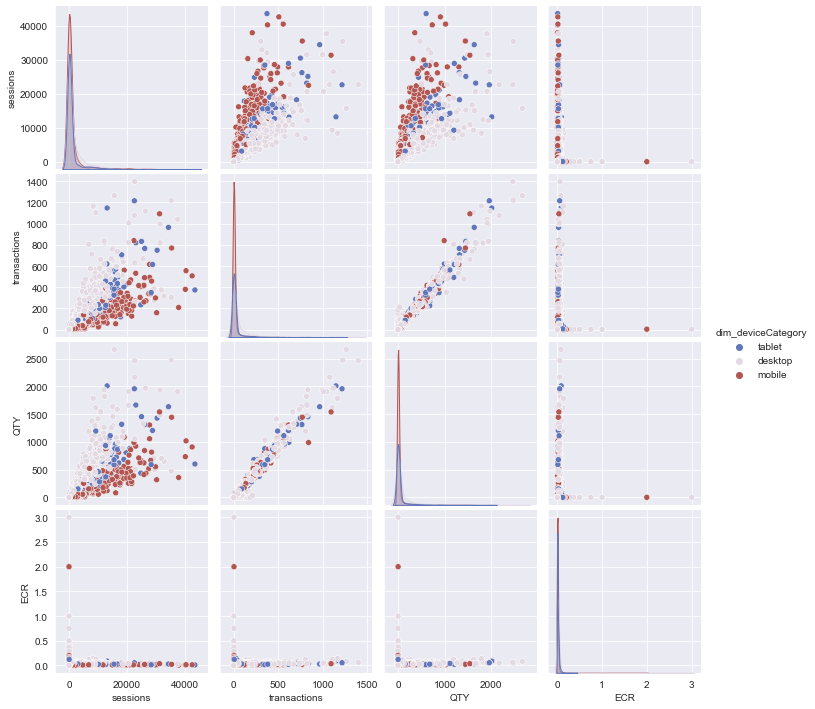

In [19]:
#sns.pairplot(df.drop(['log_pl_densitye'],axis=1),palette='twilight_shifted',hue='pl_class')
sns.pairplot(df_sC.drop(['dim_year','dim_month','dim_browser'],axis=1),palette='twilight_shifted', hue='dim_deviceCategory')

The data above suggest that 

1. QTY & transactions have a fairly linear relationship. 
2. QTY (or transactions) with sessions have some linearity or clustering when binned by device.

However, because there are so few data at high QTY, these histograms are impossible to read. Let's try dumping the high QTY values for a second:

In [20]:
#fraction of data points with QTY > 100
print(round(len(df_sC[df_sC['QTY'] > 500]['QTY'])/len(df_sC['QTY'])*1000)/10,'% of total with QTY above 500')
print(round(len(df_sC[df_sC['QTY'] > 100]['QTY'])/len(df_sC['QTY'])*1000)/10,'% of total with QTY above 100')
print(round(len(df_sC[df_sC['QTY'] > 50]['QTY'])/len(df_sC['QTY'])*1000)/10,'% of total with QTY above 50')

3.3 % of total with QTY above 500
12.9 % of total with QTY above 100
16.7 % of total with QTY above 50


array([<AxesSubplot:title={'center':'ECR'}>], dtype=object)

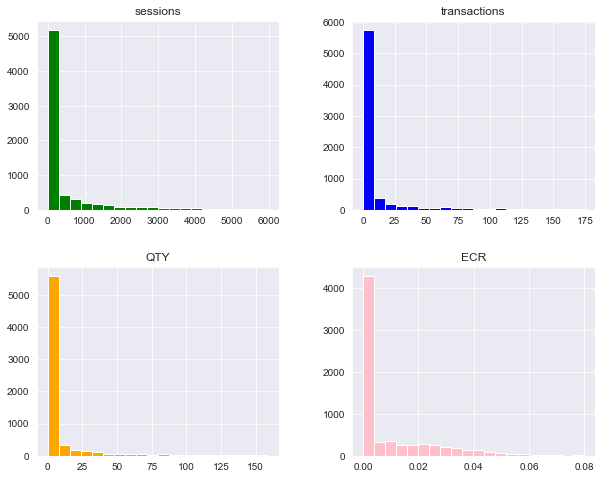

In [21]:
#sns.pairplot(df_sC[df_sC['QTY']<50].drop(['dim_year','dim_month','dim_browser'],axis=1),palette='twilight_shifted', hue='dim_deviceCategory')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
#axes[-1, -1].axis('off')

df_sC[df_sC['sessions'] < 6000].hist('sessions',bins=20, color='green',ax=axes[0,0])
df_sC[df_sC['transactions'] < 175].hist('transactions',bins=20, color='blue',ax=axes[0,1])
df_sC[df_sC['QTY'] < 160].hist('QTY',bins=20, color='orange',ax=axes[1,0])
df_sC[df_sC['ECR'] < 0.08].hist('ECR',bins=20, color='pink',ax=axes[1,1])


In [22]:
df_sC.describe()

,sessions,transactions,QTY,dim_year,dim_month,ECR
count,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7167.000000
mean,1347.157099,32.280191,58.291958,2012.539695,6.410654,inf
std,3623.452668,98.297805,184.775650,0.498454,3.357214,NaN
min,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000
25%,3.000000,0.000000,0.000000,2012.000000,4.000000,0.000000
50%,23.000000,0.000000,0.000000,2013.000000,6.000000,0.000000
75%,772.000000,9.000000,12.000000,2013.000000,9.000000,0.017943
max,43559.000000,1398.000000,2665.000000,2013.000000,12.000000,inf


In [23]:
df_sC.drop(['dim_year','dim_month','dim_browser'],axis=1).groupby(['dim_deviceCategory']).sum().sort_values(['QTY'], ascending=False)

,sessions,transactions,QTY,ECR
dim_deviceCategory,,,,
desktop,4511368,153432,278547,NaN
tablet,2277062,53351,96393,28.286262
mobile,3630483,42872,75890,17.677421


### I think it would make sense to flatten the tablet+mobile - these are more similar at least in regards to web page formats

In [24]:
df_sC_motab = cp.deepcopy(df_sC)

In [25]:
dim_deviceCategory = df_sC_motab['dim_deviceCategory'].iloc[:].values
dim_deviceCategory[dim_deviceCategory == 'tablet'] = 'tablet+mobile'
dim_deviceCategory[dim_deviceCategory == 'mobile'] = 'tablet+mobile'
df_sC_motab['dim_deviceCategory']=dim_deviceCategory


In [26]:
df_sC_motab.head(5)


,dim_browser,dim_deviceCategory,sessions,transactions,QTY,dim_year,dim_month,ECR
1,Safari,tablet+mobile,2928,127,221,2012,7,0.043374
2,Internet Explorer,desktop,1106,28,0,2012,7,0.025316
3,Chrome,tablet+mobile,474,3,13,2012,7,0.006329
4,Amazon Silk,tablet+mobile,235,4,5,2012,7,0.017021
5,Internet Explorer,tablet+mobile,178,6,11,2012,7,0.033708


In [27]:
df_sC_motab.drop(['dim_year','dim_month','dim_browser'],axis=1).groupby(['dim_deviceCategory']).sum().sort_values(['QTY'], ascending=False)

,sessions,transactions,QTY,ECR
dim_deviceCategory,,,,
desktop,4511368,153432,278547,NaN
tablet+mobile,5907545,96223,172283,45.963683


In [28]:
corr = df_sC_motab.drop(['dim_year','dim_month','dim_browser'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,sessions,transactions,QTY,ECR
sessions,1.000000,0.825087,0.812759,0.062646
transactions,0.825087,1.000000,0.986090,0.115181
QTY,0.812759,0.986090,1.000000,0.108016
ECR,0.062646,0.115181,0.108016,1.000000


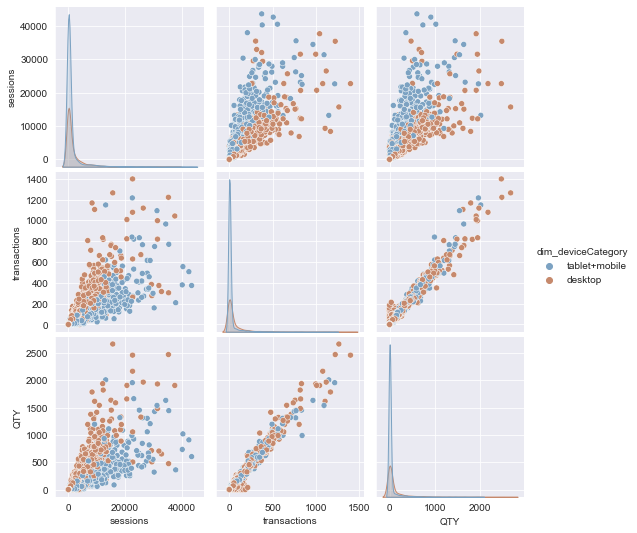

In [29]:
sns.pairplot(df_sC_motab.drop(['dim_year','dim_month','dim_browser','ECR'],axis=1),palette='twilight_shifted', hue='dim_deviceCategory')

QTY and transactions are highly correlated, perhaps as expected.

While it might not have been obvious *before* tablet and mobile were separated, **desktop** users appear to lead to *more transactions (or QTY) per session* than **tablet+mobile**. ***If time permitting, I want to explore this correlation more, by eye it looks like that trend difference could be significant.***

As this company may want to improve their sales by maximizing their browser (noting the browser interface is assumed to be different based on desktop vs. tablet+mobile) - let's find the browsers corresponding to the best cases for these metrics.

In [30]:
print("Top Browswers By ECR")
df_sC_motab.drop(['dim_year','dim_month','dim_deviceCategory'],axis=1).groupby(['dim_browser']).sum().sort_values(['ECR'], ascending=False).head(5)

Top Browswers By ECR


,sessions,transactions,QTY,ECR
dim_browser,,,,
Internet Explorer,469325,14373,11016,18.329757
Safari,5952256,140847,263776,17.937640
Chrome,2527254,66247,125468,13.240597
Firefox,495779,17376,31279,9.566353
Edge,246329,6338,11814,6.481133


In [31]:
print("Top Browswers By ECR")
df_sC_motab.drop(['dim_year','dim_month'],axis=1).groupby(['dim_browser','dim_deviceCategory']).sum().sort_values(['ECR'], ascending=False).head(5)

Top Browswers By ECR


sessions  transactions     QTY  \
dim_browser       dim_deviceCategory                                   
Internet Explorer tablet+mobile          52766          1930    1553   
Safari            desktop              1394280         57370  111797   
                  tablet+mobile        4557976         83477  151979   
Firefox           desktop               489450         17313   31158   
Internet Explorer desktop               416559         12443    9463   

                                            ECR  
dim_browser       dim_deviceCategory             
Internet Explorer tablet+mobile       11.100740  
Safari            desktop              9.607888  
                  tablet+mobile        8.329752  
Firefox           desktop              7.462100  
Internet Explorer desktop              7.229017

In [32]:
print("Top Browswers By QTY")
df_sC_motab.drop(['dim_year','dim_month','dim_deviceCategory'],axis=1).groupby(['dim_browser']).sum().sort_values(['QTY'], ascending=False).head(5)

Top Browswers By QTY


,sessions,transactions,QTY,ECR
dim_browser,,,,
Safari,5952256,140847,263776,17.937640
Chrome,2527254,66247,125468,13.240597
Firefox,495779,17376,31279,9.566353
Edge,246329,6338,11814,6.481133
Internet Explorer,469325,14373,11016,18.329757


In [33]:
print("Top Browswers By QTY")
df_sC_motab.drop(['dim_year','dim_month'],axis=1).groupby(['dim_browser','dim_deviceCategory']).sum().sort_values(['QTY'], ascending=False).head(5)

Top Browswers By QTY


,,sessions,transactions,QTY,ECR
dim_browser,dim_deviceCategory,,,,
Safari,tablet+mobile,4557976,83477,151979,8.329752
Chrome,desktop,1954932,59833,114014,6.859768
Safari,desktop,1394280,57370,111797,9.607888
Firefox,desktop,489450,17313,31158,7.462100
Edge,desktop,244925,6334,11801,5.546609


In [34]:
print("Top Browswers By sessions")
df_sC_motab.drop(['dim_year','dim_month'],axis=1).groupby(['dim_browser','dim_deviceCategory']).sum().sort_values(['sessions'], ascending=False).head(5)

Top Browswers By sessions


,,sessions,transactions,QTY,ECR
dim_browser,dim_deviceCategory,,,,
Safari,tablet+mobile,4557976,83477,151979,8.329752
Chrome,desktop,1954932,59833,114014,6.859768
Safari,desktop,1394280,57370,111797,9.607888
Chrome,tablet+mobile,572322,6414,11454,6.380829
Safari (in-app),tablet+mobile,518514,3046,5113,2.569973


In [35]:
print("Top Browswers By transactions")
df_sC_motab.drop(['dim_year','dim_month'],axis=1).groupby(['dim_browser','dim_deviceCategory']).sum().sort_values(['transactions'], ascending=False).head(5)

Top Browswers By transactions


,,sessions,transactions,QTY,ECR
dim_browser,dim_deviceCategory,,,,
Safari,tablet+mobile,4557976,83477,151979,8.329752
Chrome,desktop,1954932,59833,114014,6.859768
Safari,desktop,1394280,57370,111797,9.607888
Firefox,desktop,489450,17313,31158,7.462100
Internet Explorer,desktop,416559,12443,9463,7.229017


## Device inferring Transactions (or QTY) per Session

This is way overkill, but I want to check prelimanrily which device leads to more transactions per session (noting that transactions and QTY are fairly correlated, we should get similar results).

I'm going to do this with a simple *linear regression*. There is a lot of spread from the pairplot above, but I think this will crudly give an approximation when spitting the data on device.

In [36]:
Xd = df_sC_motab[df_sC_motab['dim_deviceCategory']=='desktop']['sessions'].iloc[:]#.values #desktop
Xd = Xd[:, None] #Linear Regression module likes Linear Algebra convention of these arrays/matrices
yd = df_sC_motab[df_sC_motab['dim_deviceCategory']=='desktop']['transactions'].iloc[:]#.values #desktop
Xm = df_sC_motab[df_sC_motab['dim_deviceCategory']=='tablet+mobile']['sessions'].iloc[:]#.values #mobile
Xm = Xm[:, None]
ym = df_sC_motab[df_sC_motab['dim_deviceCategory']=='tablet+mobile']['transactions'].iloc[:]#.values #desktop

/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_8555/1954055443.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xd = Xd[:, None] #Linear Regression module likes Linear Algebra convention of these arrays/matrices
/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_8555/1954055443.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xm = Xm[:, None]


In [37]:
from sklearn.linear_model import LinearRegression
#note, scipy's fitting routines are usually sufficient for regression type fitting - choosing sklearn as that is more prevalent in DS/Analytics

In [38]:
model_d=LinearRegression()
model_m=LinearRegression()

In [39]:
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.2, random_state = 0)

In [40]:
reg_d = model_d.fit(Xd_train, yd_train)
reg_m = model_m.fit(Xm_train, ym_train)

In [41]:
ypred_d = model_d.predict(Xd)
ypred_m = model_m.predict(Xm)

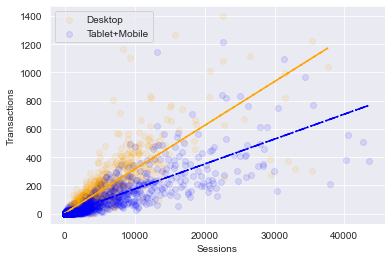

In [42]:
plt.figsize=(25,20)

plt.plot(Xd,ypred_d, linestyle='dashed',color='orange')
plt.plot(Xm,ypred_m, linestyle='dashdot',color='blue')
plt.scatter(Xd, yd, label='Desktop',color='orange', alpha=0.1)
plt.scatter(Xm, ym, label='Tablet+Mobile',color='blue', alpha=0.1)
plt.xlabel('Sessions')
plt.ylabel('Transactions')
plt.legend()

In [43]:
slope_d = reg_d.coef_
intercept_d = reg_d.intercept_

slope_m = reg_m.coef_
intercept_m = reg_m.intercept_

In [44]:
#The ratio of the slopes could be be an indicator of how many more 
sloperat=slope_d/slope_m

In [45]:
sloperat

array([1.75768169])

Preliminarily, as the number of sessions increase, the number of transactions by Desktop exceed those by Mobile+Tablet by a factor of about ~1.76.

In [46]:
df_sC_motab.drop(['dim_year','dim_month','ECR'],axis=1).groupby(['dim_deviceCategory']).sum().sort_values(['transactions'], ascending=False)

,sessions,transactions,QTY
dim_deviceCategory,,,
desktop,4511368,153432,278547
tablet+mobile,5907545,96223,172283
